### Import necessary libararys

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data Loading

In [84]:
df=pd.read_csv("/content/drive/MyDrive/Bank chatbot /bankchatbot/BankFAQs.csv")

### Printing First Five Rows of Data

### Data Information

In [85]:
df.head(10)

,Question,Answer,Class
0,Do I need to enter ‘#’ after keying in my Card...,Please listen to the recorded message and foll...,security
1,Hello,hello.,security
2,What details are required when I want to perfo...,"To perform a secure IVR transaction, you will ...",security
3,How should I get the IVR Password if I hold a...,An IVR password can be requested only from the...,security
4,How do I register my Mobile number for IVR Pas...,Please call our Customer Service Centre and en...,security
5,How can I obtain an IVR Password,By Sending SMS request: Send an SMS 'PWD<space...,security
6,Can I use the same IVR Password to perform mu...,"No, each IVR password can be used only for a m...",security
7,Can I generate multiple IVR Passwords,"No, only one IVR password can be generated at ...",security
8,How do I register for IVR password,There is no registration process. However you ...,security
9,What is IVR Password and how does it work,To make telephonic (IVR) transactions more sec...,security


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  1765 non-null   object
 1   Answer    1765 non-null   object
 2   Class     1765 non-null   object
dtypes: object(3)
memory usage: 41.5+ KB


### Basic Stats About Data

In [87]:
df.describe().T

,count,unique,top,freq
Question,1765,1335,How can I change the mode of repayment/ accoun...,18
Answer,1765,1441,Post Dated Cheques(PDCs)/Security Cheques subm...,17
Class,1765,7,insurance,469


### Data count of Each class

In [88]:
df['Class'].value_counts()

insurance        469
cards            403
loans            375
accounts         306
investments      140
security          58
fundstransfer     14
Name: Class, dtype: int64

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Splitting Data into Train and Test

In [91]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

### Applying Word embedding Techniques on Features

In [92]:
# Transform the text data into feature vectors
X_train = vectorizer.fit_transform(train_data['Question'])
X_test = vectorizer.transform(test_data['Question'])

### Target

In [93]:
# Define the labels
y_train = train_data['Class']
y_test = test_data['Class']

### Applying SVC Model

In [94]:
from sklearn.svm import SVC

In [95]:
# Train the SVM model
svm_model = SVC(C=1, kernel='rbf', gamma=0.01, decision_function_shape='ovr')
svm_model.fit(X_train, y_train)

SVC(C=1, gamma=0.01)

In [96]:
# Make predictions on the test set
svm_predictions = svm_model.predict(X_test)

In [97]:
svm_accuracy = accuracy_score(y_test, svm_predictions)

### Printing Accuracy of Svm

In [98]:
print("SVM accuracy:", svm_accuracy)

SVM accuracy: 0.7818696883852692


### Confusion Matrix

SVM confusion matrix:


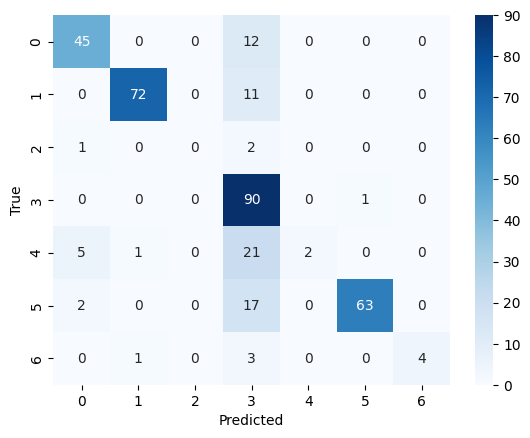

In [99]:
print("SVM confusion matrix:")
cm=(confusion_matrix(y_test, svm_predictions))
# create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Classification Report

In [100]:
print("SVM classification report:")
print(classification_report(y_test, svm_predictions))

SVM classification report:
               precision    recall  f1-score   support

     accounts       0.85      0.79      0.82        57
        cards       0.97      0.87      0.92        83
fundstransfer       0.00      0.00      0.00         3
    insurance       0.58      0.99      0.73        91
  investments       1.00      0.07      0.13        29
        loans       0.98      0.77      0.86        82
     security       1.00      0.50      0.67         8

     accuracy                           0.78       353
    macro avg       0.77      0.57      0.59       353
 weighted avg       0.85      0.78      0.76       353



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Applying NavieBayes Algorithm

In [101]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [102]:
# Define the hyperparameter grid to search
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False],
}

# Create the Multinomial Naive Bayes model
mnb = MultinomialNB()
# Perform grid search with cross-validation
grid_search = GridSearchCV(mnb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
# Get the best model and make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:", accuracy)

Accuracy score: 0.9291784702549575


In [110]:
nb_predictions = best_model.predict(X_test)

In [111]:
nb_accuracy = accuracy_score(y_test, nb_predictions)

In [105]:
print("Naive Bayes accuracy:", nb_accuracy)

Naive Bayes accuracy: 0.9291784702549575


Naive Bayes confusion matrix:


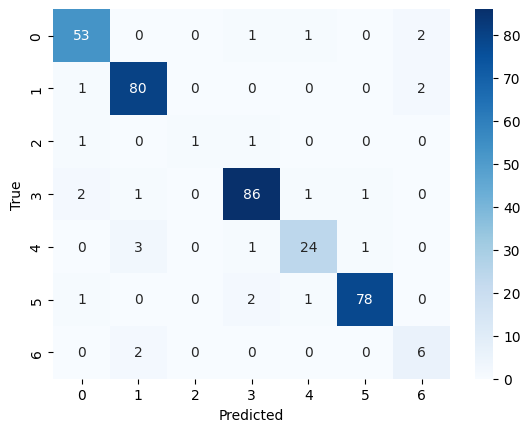

In [106]:
print("Naive Bayes confusion matrix:")
cm=(confusion_matrix(y_test, nb_predictions))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [107]:
# Print the classification report and confusion matrix for Naive Bayes model
print("Naive Bayes classification report:")
print(classification_report(y_test, nb_predictions))

Naive Bayes classification report:
               precision    recall  f1-score   support

     accounts       0.91      0.93      0.92        57
        cards       0.93      0.96      0.95        83
fundstransfer       1.00      0.33      0.50         3
    insurance       0.95      0.95      0.95        91
  investments       0.89      0.83      0.86        29
        loans       0.97      0.95      0.96        82
     security       0.60      0.75      0.67         8

     accuracy                           0.93       353
    macro avg       0.89      0.81      0.83       353
 weighted avg       0.93      0.93      0.93       353



# predictions

In [115]:
from sklearn.metrics.pairwise import cosine_similarity
input_question = "cibil"
input_vector = vectorizer.transform([input_question])
predicted_class = best_model.predict(input_vector)[0]
class_data = df[df['Class'] == predicted_class]
class_vectors = vectorizer.transform(class_data['Question'])
similarities = cosine_similarity(input_vector, class_vectors)
most_similar_index = similarities.argmax()
predicted_answer = class_data.iloc[most_similar_index]['Answer']

# Print the predicted class and answer
print("Predicted class:", predicted_class)
print("Predicted answer:", predicted_answer)

Predicted class: loans
Predicted answer: CIBIL stands for Credit Information Bureau India Limited. CIBIL's aim is to fulfil the need of credit granting institutions for comprehensive credit information by collecting, collating and disseminating credit information pertaining to both commercial and consumer borrowers, to a closed user group of members. Banks, Financial Institutions, Non-Banking Financial Companies, Housing Finance Companies and Credit Card Companies use CIBIL's services. Data sharing is based on the Principle of Reciprocity, which means that only Members who have submitted all their credit data may access Credit Information Reports from CIBIL. The establishment of CIBIL is an effort made by the Government of India and the Reserve Bank of India to improve the functionality and stability of the Indian financial system by containing NPAs while improving credit grantors' portfolio quality. CIBIL provides a vital service, which allows its Members to make informed, objective a